# Feature Engineering 1

In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
# Combine all the clean data into one dataframe
df_2016 = pd.read_csv('D:/NHLPro/data/2016_cleaned.csv')
df_2017 = pd.read_csv('D:/NHLPro/data/2017_cleaned.csv')
df_2018 = pd.read_csv('D:/NHLPro/data/2018_cleaned.csv')
df_2019 = pd.read_csv('D:/NHLPro/data/2019_cleaned.csv')

df = pd.concat([df_2016, df_2017, df_2018, df_2019])

In [3]:
df.shape

(327342, 13)

In [4]:
df.head()

,game_id,period,period_time,team,event,coordinates_x,coordinates_y,secondary_type,empty_net,strength_name,rinkSide,shooter,goalie
0,2016020001,1.0,01:11,Toronto Maple Leafs,Shot,-77.0,5.0,Wrist Shot,NaN,NaN,right,Mitchell Marner,Craig Anderson
1,2016020001,1.0,02:53,Ottawa Senators,Shot,86.0,13.0,Wrist Shot,NaN,NaN,left,Chris Kelly,Frederik Andersen
2,2016020001,1.0,04:01,Ottawa Senators,Shot,23.0,-38.0,Wrist Shot,NaN,NaN,left,Cody Ceci,Frederik Andersen
3,2016020001,1.0,04:46,Ottawa Senators,Shot,33.0,-15.0,Slap Shot,NaN,NaN,left,Erik Karlsson,Frederik Andersen
4,2016020001,1.0,06:46,Toronto Maple Leafs,Shot,-34.0,28.0,Wrist Shot,NaN,NaN,right,Martin Marincin,Craig Anderson


In [5]:
# Calculate the distance from net for each shot based on the rink side of the team
# and the coordinates of the shot
def calculate_distance_from_net(df, games_metadata):
    """
        This function calculates the distance from net for each shot based on the rink side of the team
        and the coordinates of the shot.
    """
    for index, row in df.iterrows():
        if row['team'] in games_metadata[row['game_id']]:
            if games_metadata[row['game_id']][row['team']] == 'left':
                df.loc[index, 'distance_from_net'] = math.sqrt((row['coordinates_x'] - 89)**2 + row['coordinates_y']**2)
            else:
                df.loc[index, 'distance_from_net'] = math.sqrt((row['coordinates_x'] + 89)**2 + row['coordinates_y']**2)
        else:
            df.loc[index, 'distance_from_net'] = np.nan
    return df

# Create games_metadata dictionary
games_metadata = {}
for index, row in df.iterrows():
    if row['game_id'] not in games_metadata:
        games_metadata[row['game_id']] = {}
    games_metadata[row['game_id']][row['team']] = row['rinkSide']

df = calculate_distance_from_net(df, games_metadata)

In [6]:
# Calculate the angle from net for each shot based on the rink side of the team using tan
def calculate_angle_from_net(df, games_metadata):
    """
        This function calculates the angle from net for each shot based on the rink side of the team
        and the coordinates of the shot. 
    """
    for index, row in df.iterrows():
        if row['team'] in games_metadata[row['game_id']]:
            if games_metadata[row['game_id']][row['team']] == 'left':
                df.loc[index, 'angle_from_net'] = np.arctan(row['coordinates_y']/row['distance_from_net'])*180/math.pi
            else:
                df.loc[index, 'angle_from_net'] = np.arctan(row['coordinates_y']/row['distance_from_net'])*-180/math.pi
        else:
            df.loc[index, 'angle_from_net'] = np.nan
    return df

df = calculate_angle_from_net(df, games_metadata)

In [7]:
# Create a column isgoal based on the event type
def create_isgoal_column(df):
    """
        This function creates a column isgoal based on the event type.
    """
    for index, row in df.iterrows():
        if row['event'] == 'Goal':
            df.loc[index, 'isgoal'] = 1
        else:
            df.loc[index, 'isgoal'] = 0
    return df

df = create_isgoal_column(df)


In [8]:
df.head()

,game_id,period,period_time,team,event,coordinates_x,coordinates_y,secondary_type,empty_net,strength_name,rinkSide,shooter,goalie,distance_from_net,angle_from_net,isgoal
0,2016020001,1.0,01:11,Toronto Maple Leafs,Shot,-77.0,5.0,Wrist Shot,NaN,NaN,right,Mitchell Marner,Craig Anderson,4.123106,-13.633022,1.0
1,2016020001,1.0,02:53,Ottawa Senators,Shot,86.0,13.0,Wrist Shot,NaN,NaN,left,Chris Kelly,Frederik Andersen,57.035077,2.008319,0.0
2,2016020001,1.0,04:01,Ottawa Senators,Shot,23.0,-38.0,Wrist Shot,NaN,NaN,left,Cody Ceci,Frederik Andersen,26.683328,-12.672721,0.0
3,2016020001,1.0,04:46,Ottawa Senators,Shot,33.0,-15.0,Slap Shot,NaN,NaN,left,Erik Karlsson,Frederik Andersen,36.055513,29.017141,0.0
4,2016020001,1.0,06:46,Toronto Maple Leafs,Shot,-34.0,28.0,Wrist Shot,NaN,NaN,right,Martin Marincin,Craig Anderson,55.226805,27.704293,0.0


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

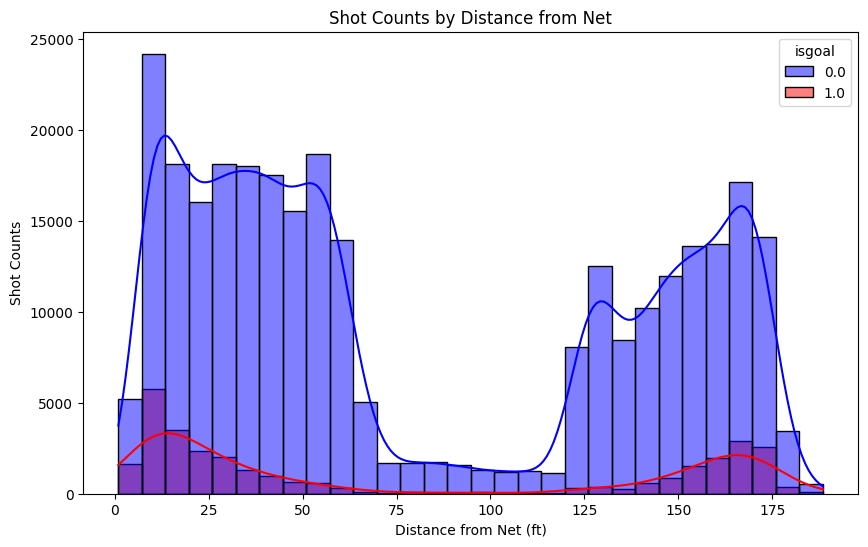

In [13]:
plt.figure(figsize=(10, 6))
df = df.reset_index()
sns.histplot(df, x='distance_from_net', hue='isgoal', bins=30, kde=True, palette=['blue', 'red'])
plt.title('Shot Counts by Distance from Net')
plt.xlabel('Distance from Net (ft)')
plt.ylabel('Shot Counts')
plt.show()


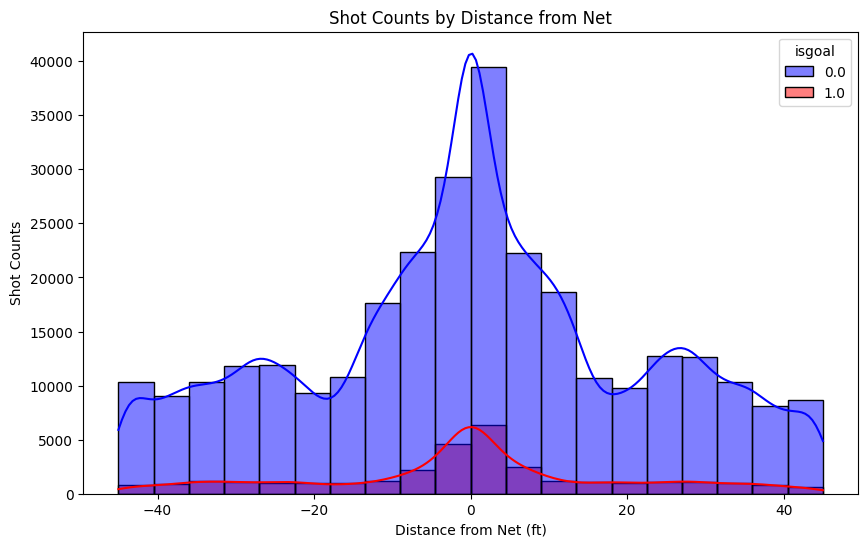

In [12]:
# Create histogram using angle and is_goal using histplot
plt.figure(figsize=(10, 6))
sns.histplot(df, x='angle_from_net', hue='isgoal', bins=20,kde=True, palette=['blue', 'red'])
plt.title('Shot Counts by Distance from Net')
plt.xlabel('Distance from Net (ft)')
plt.ylabel('Shot Counts')
plt.show()

<Figure size 1000x600 with 0 Axes>

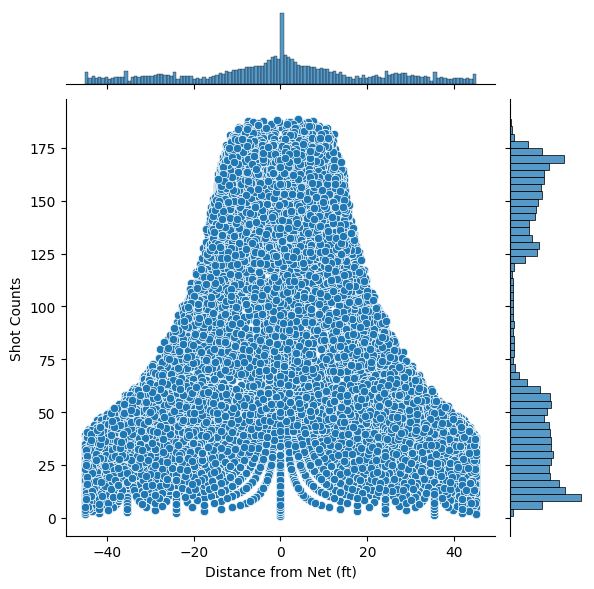

In [16]:
# A 2D histogram where one axis is the distance and the other is the angle. You do not need to separate goals and no-goals.
# Using jointplot
plt.figure(figsize=(10, 6))
sns.jointplot(x='angle_from_net', y='distance_from_net', data=df)
plt.xlabel('Distance from Net (ft)')
plt.ylabel('Shot Counts')
plt.show()